# Naive implementation of OCSVM (Schölkopf) in Tensorflow
[Original paper by Schölkopf](https://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf)

Here is our implementation with linear kernel

### $$ \frac{1}{2} \Vert{w}\Vert^{2} - \rho + C \sum_{i=1}^N \xi_i $$
subject to constraint:

### $$ w^{T} x_i \geq \rho - \xi_i$$

- $w$ and $\rho$ are the parameters who define the hyperplan separating data from the origin
- $\xi_i$ are slack variables that are zero if $x_i$ is in the sphere, and represent its distance to the sphere otherwise
- $C$ controls the hardness of the margin

In [50]:
import sys
import tensorflow as tf
import numpy as np
np.random.seed(1)

In [51]:
DIMS = 2
INPUTS_NBR = 50
C = 1e-8

# Variables to train
ro = tf.Variable(tf.random_normal([], mean=0.1), dtype=tf.float32)
w = tf.Variable(tf.random_normal([DIMS, 1], mean=0.1), dtype=tf.float32)

# Inputs and constants
X = tf.placeholder(tf.float32, shape=(None, DIMS), name="X")
C = tf.constant(10, dtype=tf.float32)

# Define the loss

In [52]:
constraint = tf.matmul(X, w) - ro
loss = 0.5 * tf.square(tf.norm(w)) - ro - C * tf.reduce_mean(tf.minimum(constraint, 0.0))

# the loss is summed over all the batch
#loss = tf.reduce_sum(loss)

# Define the optimizer and train

In [53]:
optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(loss)

EPOCHS = 5000

np.random.seed(1)
inputs = np.random.normal(3*np.ones(DIMS), scale=1, size=(INPUTS_NBR, DIMS))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(EPOCHS):
        _, l, ro1, w1 = sess.run([train, loss, ro, w], feed_dict={X: inputs})
        
        towrite = "\r{0:4.1f} %, Loss: {1:7.4f}, ro: {2:7.4f}, w1:".format(e / EPOCHS * 100, l, ro1) + str(w1)
        sys.stdout.write(towrite)
        sys.stdout.flush()

 0.0 %, Loss: 20.6167, ro:  0.1369, w1:[[ 0.56713945]
 0.0 %, Loss: 14.2267, ro:  0.0372, w1:[[ 0.6667172]
 0.0 %, Loss:  8.2784, ro: -0.0622, w1:[[ 0.76588976]
 0.1 %, Loss:  3.9498, ro: -0.1565, w1:[[ 0.85981816]
 0.1 %, Loss:  1.6732, ro: -0.2399, w1:[[ 0.94327325]
 0.1 %, Loss:  1.0418, ro: -0.3102, w1:[[ 1.0155847 ]
 0.1 %, Loss:  0.9544, ro: -0.3679, w1:[[ 1.0775881 ]
 0.1 %, Loss:  1.0439, ro: -0.4150, w1:[[ 1.1310574 ]
 0.2 %, Loss:  1.1248, ro: -0.4532, w1:[[ 1.1772932 ]
 0.2 %, Loss:  1.1971, ro: -0.4837, w1:[[ 1.2172889 ]
 0.2 %, Loss:  1.2608, ro: -0.5076, w1:[[ 1.2518281 ]
 0.2 %, Loss:  1.3162, ro: -0.5255, w1:[[ 1.2815453 ]
 0.2 %, Loss:  1.3636, ro: -0.5382, w1:[[ 1.3069651 ]
 0.3 %, Loss:  1.4031, ro: -0.5463, w1:[[ 1.3285291 ]
 0.3 %, Loss:  1.4352, ro: -0.5500, w1:[[ 1.3466142 ]
 0.3 %, Loss:  1.4602, ro: -0.5500, w1:[[ 1.3615465 ]
 0.3 %, Loss:  1.4785, ro: -0.5465, w1:[[ 1.373611  ]
 0.3 %, Loss:  1.4904, ro: -0.5398, w1:[[ 1.3830589 ]
 0.4 %, Loss:  1.4963, ro: -0

 3.1 %, Loss: -3.3804, ro:  4.5439, w1:[[1.0846329 ]
 3.1 %, Loss: -3.3965, ro:  4.5757, w1:[[1.0929078]
 3.1 %, Loss: -3.4138, ro:  4.6060, w1:[[1.1024611 ]
 3.2 %, Loss: -3.4308, ro:  4.6364, w1:[[1.1121117 ]
 3.2 %, Loss: -3.4464, ro:  4.6685, w1:[[1.1199669]
 3.2 %, Loss: -3.4626, ro:  4.7022, w1:[[1.1261755 ]
 3.2 %, Loss: -3.4797, ro:  4.7357, w1:[[1.1327487]
 3.2 %, Loss: -3.4959, ro:  4.7691, w1:[[1.1396357 ]
 3.3 %, Loss: -3.5107, ro:  4.8008, w1:[[1.1478442]
 3.3 %, Loss: -3.5265, ro:  4.8310, w1:[[1.1572287]
 3.3 %, Loss: -3.5432, ro:  4.8599, w1:[[1.1676543]
 3.3 %, Loss: -3.5569, ro:  4.8906, w1:[[1.1760288]
 3.3 %, Loss: -3.5714, ro:  4.9232, w1:[[1.182524 ]
 3.4 %, Loss: -3.5877, ro:  4.9573, w1:[[1.1872998]
 3.4 %, Loss: -3.6032, ro:  4.9898, w1:[[1.1935022]
 3.4 %, Loss: -3.6170, ro:  5.0207, w1:[[1.2009801]
 3.4 %, Loss: -3.6317, ro:  5.0501, w1:[[1.2095933]
 3.4 %, Loss: -3.6472, ro:  5.0784, w1:[[1.2192118]
 3.5 %, Loss: -3.6610, ro:  5.1087, w1:[[1.2266825]
 3.5 %,

 6.3 %, Loss: -4.6185, ro:  8.2212, w1:[[1.9617229]
 6.3 %, Loss: -4.6211, ro:  8.2372, w1:[[1.963192 ]
 6.3 %, Loss: -4.6233, ro:  8.2517, w1:[[1.965902 ]
 6.3 %, Loss: -4.6250, ro:  8.2648, w1:[[1.969722 ]
 6.3 %, Loss: -4.6274, ro:  8.2766, w1:[[1.9745299]
 6.4 %, Loss: -4.6293, ro:  8.2895, w1:[[1.9783137]
 6.4 %, Loss: -4.6310, ro:  8.3033, w1:[[1.9811575]
 6.4 %, Loss: -4.6330, ro:  8.3180, w1:[[1.9831412]
 6.4 %, Loss: -4.6354, ro:  8.3335, w1:[[1.9843401]
 6.4 %, Loss: -4.6364, ro:  8.3475, w1:[[1.9867365]
 6.5 %, Loss: -4.6379, ro:  8.3601, w1:[[1.9902052]
 6.5 %, Loss: -4.6400, ro:  8.3714, w1:[[1.9946284]
 6.5 %, Loss: -4.6425, ro:  8.3817, w1:[[1.9998963]
 6.5 %, Loss: -4.6436, ro:  8.3931, w1:[[2.003981 ]
 6.5 %, Loss: -4.6448, ro:  8.4058, w1:[[2.0069811]
 6.6 %, Loss: -4.6464, ro:  8.4194, w1:[[2.0089893]
 6.6 %, Loss: -4.6485, ro:  8.4340, w1:[[2.0100935]
 6.6 %, Loss: -4.6510, ro:  8.4494, w1:[[2.010377 ]
 6.6 %, Loss: -4.6516, ro:  8.4633, w1:[[2.01186  ]
 6.6 %, Loss

 9.4 %, Loss: -4.7307, ro:  9.4605, w1:[[2.24071  ]
 9.4 %, Loss: -4.7307, ro:  9.4644, w1:[[2.2409983]
 9.5 %, Loss: -4.7308, ro:  9.4679, w1:[[2.241579 ]
 9.5 %, Loss: -4.7308, ro:  9.4711, w1:[[2.242421 ]
 9.5 %, Loss: -4.7309, ro:  9.4739, w1:[[2.243494 ]
 9.5 %, Loss: -4.7310, ro:  9.4765, w1:[[2.2447705]
 9.5 %, Loss: -4.7312, ro:  9.4788, w1:[[2.246224 ]
 9.6 %, Loss: -4.7313, ro:  9.4809, w1:[[2.2478294]
 9.6 %, Loss: -4.7314, ro:  9.4856, w1:[[2.2471395]
 9.6 %, Loss: -4.7314, ro:  9.4899, w1:[[2.2468095]
 9.6 %, Loss: -4.7314, ro:  9.4937, w1:[[2.246806 ]
 9.6 %, Loss: -4.7314, ro:  9.4972, w1:[[2.247097 ]
 9.7 %, Loss: -4.7315, ro:  9.5003, w1:[[2.2476525]
 9.7 %, Loss: -4.7315, ro:  9.5031, w1:[[2.2484436]
 9.7 %, Loss: -4.7316, ro:  9.5056, w1:[[2.2494433]
 9.7 %, Loss: -4.7317, ro:  9.5079, w1:[[2.250626 ]
 9.7 %, Loss: -4.7318, ro:  9.5100, w1:[[2.251968 ]
 9.8 %, Loss: -4.7320, ro:  9.5118, w1:[[2.2534463]
 9.8 %, Loss: -4.7321, ro:  9.5135, w1:[[2.2550404]
 9.8 %, Loss

12.6 %, Loss: -4.7344, ro:  9.7187, w1:[[2.296187 ]
12.6 %, Loss: -4.7344, ro:  9.7215, w1:[[2.2942016]
12.6 %, Loss: -4.7344, ro:  9.7240, w1:[[2.2924664]
12.6 %, Loss: -4.7344, ro:  9.7262, w1:[[2.2909675]
12.7 %, Loss: -4.7343, ro:  9.7283, w1:[[2.2896907]
12.7 %, Loss: -4.7343, ro:  9.7301, w1:[[2.2886224]
12.7 %, Loss: -4.7343, ro:  9.7317, w1:[[2.2877486]
12.7 %, Loss: -4.7343, ro:  9.7332, w1:[[2.2870557]
12.7 %, Loss: -4.7342, ro:  9.7346, w1:[[2.2865305]
12.8 %, Loss: -4.7342, ro:  9.7358, w1:[[2.2861595]
12.8 %, Loss: -4.7342, ro:  9.7369, w1:[[2.28593  ]
12.8 %, Loss: -4.7342, ro:  9.7379, w1:[[2.2858293]
12.8 %, Loss: -4.7342, ro:  9.7387, w1:[[2.2858458]
12.8 %, Loss: -4.7342, ro:  9.7395, w1:[[2.2859676]
12.9 %, Loss: -4.7342, ro:  9.7402, w1:[[2.2861838]
12.9 %, Loss: -4.7342, ro:  9.7409, w1:[[2.2864838]
12.9 %, Loss: -4.7342, ro:  9.7415, w1:[[2.2868574]
12.9 %, Loss: -4.7342, ro:  9.7420, w1:[[2.2872949]
12.9 %, Loss: -4.7342, ro:  9.7425, w1:[[2.2877874]
13.0 %, Loss

15.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302741 ]
15.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027408]
15.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027406]
15.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027403]
15.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027399]
15.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027394]
15.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302739 ]
15.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027384]
15.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302738 ]
15.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027375]
15.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302737 ]
16.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027365]
16.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302736 ]
16.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027356]
16.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302735 ]
16.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027346]
16.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027341]
16.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302734 ]
16.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027337]
16.1 %, Loss

18.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
19.3 %, Loss: -4.7345, ro:  9.7

22.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
22.5 %, Loss: -4.7345, ro:  9.7

25.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
25.8 %, Loss: -4.7345, ro:  9.7

28.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
28.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
29.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
29.0 %, Loss: -4.7345, ro:  9.7

31.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
31.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
32.2 %, Loss: -4.7345, ro:  9.7

35.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
35.4 %, Loss: -4.7345, ro:  9.7

38.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.302731]
38.6 %, Loss: -4.7345, ro:  9.7

41.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
41.8 %, Loss

44.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
44.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
45.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
45.0 %, Loss

47.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
47.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
48.1 %, Loss

50.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
50.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
51.3 %, Loss

54.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
54.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
54.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
54.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
54.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027313]
54.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
54.5 %, Loss

57.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
57.6 %, Loss

60.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
60.8 %, Loss

63.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
63.9 %, Loss

66.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
66.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
67.1 %, Loss

69.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
69.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
69.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
69.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
70.3 %, Loss

73.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
73.4 %, Loss

76.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
76.6 %, Loss

79.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027315]
79.7 %, Loss

82.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
82.9 %, Loss

85.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
85.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
86.1 %, Loss

88.8 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
88.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
88.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
88.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
88.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
88.9 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
89.2 %, Loss

92.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.0 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.1 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
92.4 %, Loss

95.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.2 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
95.5 %, Loss

98.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.3 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.4 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.5 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.6 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.7 %, Loss: -4.7345, ro:  9.7468, w1:[[2.3027318]
98.7 %, Loss

# Visualize the outputs

In [54]:
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(npwx.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

NameError: name 'npwx' is not defined

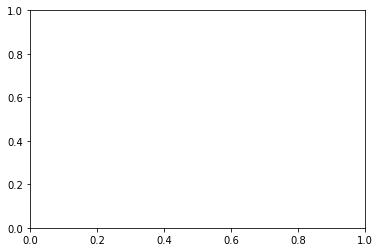

In [55]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="linear")
clf.fit(inputs)

fig = plt.gcf()
ax = fig.gca()
X0, X1 = inputs[:, 0], inputs[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

In [ ]:
w1

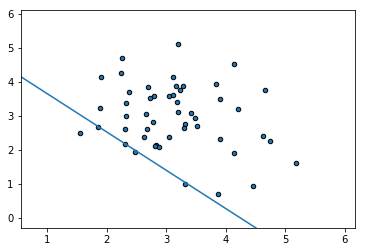

In [46]:
fig = plt.gcf()
ax = fig.gca()
X0, X1 = inputs[:, 0], inputs[:, 1]
xx, yy = make_meshgrid(X0, X1)

a = -w1[0] / w1[1]
xx2 = np.linspace(-5, 5)
yy2 = a * xx2 + ro1 / w1[1]

ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.plot(xx2,yy2)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

In [49]:
w

<tf.Variable 'Variable_7:0' shape=(2, 1) dtype=float32_ref>

In [48]:
l

-4.7344604